# Technique: 05 Discretization

### What is this?
Discretization means cutting a long range of numbers into small "bins" or "intervals." For example, instead of using the exact Age (21, 22, 23...), we use groups like "Young," "Adult," and "Senior."

### Why use it?
1. It is good for computer models that only like categorical data.
2. it helps reduce data size (Data Reduction).
3. It makes the data easier to understand for humans.

### Methods :
* **Binning (Equal Width)**: Dividing the numbers into equal-sized ranges.
* **Clustering**: Grouping numbers that are close to each other.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_generator import generate_dtt_dataset, GLOBAL_SEED

# Initialize Dataset
df = generate_dtt_dataset()
print(f'Dataset loaded with Global Seed: {GLOBAL_SEED}')
df.head()

Dataset loaded with Global Seed: 888


,Age,Annual_Salary,Household_Size,Education_Level,Region,Cluster_Feature_1,Cluster_Feature_2,Transaction_Amount
0,47,293814.560245,2.219505,Master,North,-0.666995,8.207288,3.257499
1,63,293814.560245,1.967882,High School,East,-1.843954,-8.553721,68.050678
2,55,293814.560245,1.828750,PhD,East,6.498745,-7.157678,8.111841
3,36,293814.560245,1.772328,Bachelor,East,-1.257460,-8.568788,27.766274
4,42,293814.560245,3.174114,Master,North,8.144192,-6.575686,13.867245


Original Age (First 10 rows):
0    47
1    63
2    55
3    36
4    42
5    45
6    49
7    53
8    64
9    53
Name: Age, dtype: int32


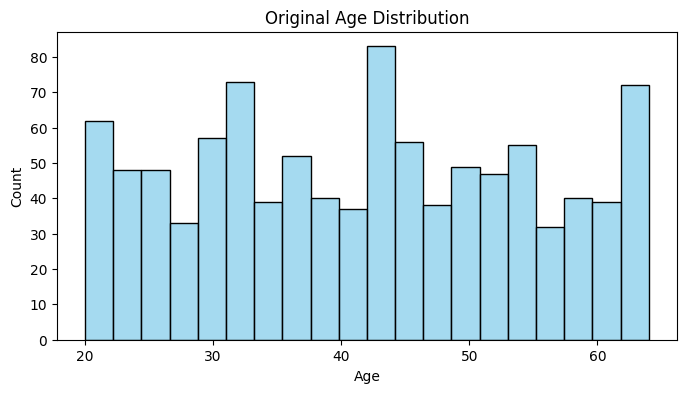

In [7]:
print("Original Age (First 10 rows):")
print(df['Age'].head(10))

plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=20, color='skyblue')
plt.title("Original Age Distribution")
plt.show()

## Method 1: Binning (Equal Width)
We can use `pd.cut` to split the Age into 3 equal groups: **Young**, **Middle-Aged**, and **Senior**. 
This is an "Unsupervised" method because we don't use a class label.

In [9]:
# 1. Define the bins and labels
# We split the Age range into 3 equal parts
df['Age_Bins'] = pd.cut(df['Age'], bins=3, labels=['Young', 'Middle-Aged', 'Senior'])

# 2. See how many people are in each group
# Fixed: We use 'value_counts()' with an 's'
print("Count of people in each Age group:")
print(df['Age_Bins'].value_counts())

# 3. Check the results
print("\nAge vs Age Group:")
print(df[['Age', 'Age_Bins']].head(10))

Count of people in each Age group:
Age_Bins
Middle-Aged    354
Young          337
Senior         309
Name: count, dtype: int64

Age vs Age Group:
   Age     Age_Bins
0   47  Middle-Aged
1   63       Senior
2   55       Senior
3   36  Middle-Aged
4   42  Middle-Aged
5   45  Middle-Aged
6   49  Middle-Aged
7   53       Senior
8   64       Senior
9   53       Senior


## Method 2: KBinsDiscretizer (Scikit-Learn)
We can also use a professional tool. Here, we use the "uniform" strategy, which means every bin has the same width.

C:\Users\ThomasLiu-PC\AppData\Local\Temp\ipykernel_41820\2264248325.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Transaction_Group', data=df, palette='viridis')


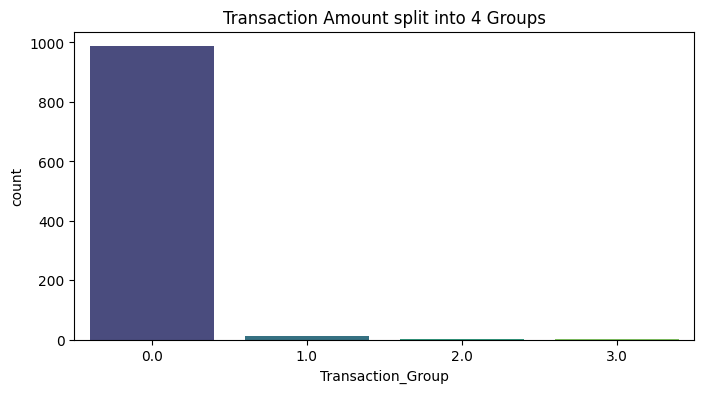

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

# 1. Setup the tool for 4 bins
# encode='ordinal' gives numbers like 0, 1, 2, 3
est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')

# 2. Change the Transaction_Amount data
df['Transaction_Group'] = est.fit_transform(df[['Transaction_Amount']])

# 3. Visualize the new groups
plt.figure(figsize=(8, 4))
sns.countplot(x='Transaction_Group', data=df, palette='viridis')
plt.title("Transaction Amount split into 4 Groups")
plt.show()

### Summary from Lecture Slides:
* **Top-Down vs Bottom-Up**: Binning is a "Top-Down" split. We start with one big group and cut it. 
* **Supervised vs Unsupervised**: We used "Unsupervised" binning today. "Supervised" binning uses class labels (like Entropy-based) to find the best split.
* **Reduction**: Now, we only have a few categories instead of many different numbers. This makes the dataset smaller!